In [1]:
import random
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os

In [2]:
import pandas as pd
df = pd.read_csv('./IMDB Dataset.csv')

In [3]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [4]:
neg_review = []
pos_review = []

In [5]:
for idx in range(len(df)):
    if df['sentiment'][idx] == 'positive':
        pos_review.append(df['review'][idx])
    else:
        neg_review.append(df['review'][idx])

In [6]:
len(neg_review)

25000

In [7]:
negative_rev = neg_review[:1000]
positive_rev = pos_review[:1000]

In [8]:
positive_rev[999]

"Gary Busey is superb in this musical biography. Great singing and excellent soundtrack. The Buddy Holly Story is a much better movie than La Bamba. From reading other comments, there may be some historical inaccuracies. Regardless, it is a fun toe-tapping film, and a good introduction to Buddy Holly's music."

## Preprocessing

In [10]:
all_words = []
documents = []
#
from nltk.corpus import stopwords
import re

stop_words = list(set(stopwords.words('english')))
# j is adject, r is adverb, and v is verb
#allowed_word_types = ["J", "R", "V"]

allowed_word_types = ['J']

for p in positive_rev:
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append((p, 'pos'))
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]', '', p)
    
    # Tokenize
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word
    pos = nltk.pos_tag(stopped)
    
    # Make a list of all the adjectives 
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

for p in negative_rev:
    # Create a list of tuples where the first element of each tuple is a review
    # the second element is a label
    documents.append((p, 'neg'))
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]', '', p)
    
    # tokenize
    tokenized = word_tokenize(cleaned)
    #
    stopped = [w for w in tokenized if not w in stop_words]
    
    # Parts of speech tagging
    neg = nltk.pos_tag(stopped)
    
    # Make a list of all adjectives identified by the allowed word types list above
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

### Creating a frequency distribution of adjectives

In [11]:
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 1045, 'bad': 663, 'great': 619, 'many': 537, 'much': 527, 'little': 470, 'best': 388, 'real': 365, 'first': 340, 'old': 300, ...})

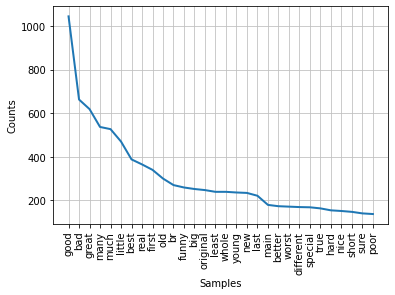

In [12]:
import matplotlib.pyplot as plt
all_words.plot(30, cumulative = False)
plt.show()

In [13]:
word_features = list(all_words.keys())[:1000]
word_features

['first',
 'classic',
 'experimental',
 'high',
 'irish',
 'shady',
 'awaybr',
 'main',
 'due',
 'painted',
 'charm',
 'struck',
 'nasty',
 'ready',
 'accustomed',
 'graphic',
 'crooked',
 'nickel',
 'mannered',
 'middle',
 'comfortable',
 'uncomfortable',
 'touch',
 'wonderful',
 'little',
 'oldtimebbc',
 'entire',
 'polari',
 'seamless',
 'guided',
 'diary',
 'terrificly',
 'masterful',
 'great',
 'use',
 'traditional',
 'solid',
 'flat',
 'spend',
 'hot',
 'simplistic',
 'likable',
 'serial',
 'many',
 'grown',
 'lovebr',
 'right',
 'young',
 'wittier',
 'vivid',
 'human',
 'different',
 'br',
 'theme',
 'present',
 'connect',
 'next',
 'previous',
 'luxurious',
 'souls',
 'big',
 'best',
 'sincere',
 'fulfillment',
 'good',
 'alltime',
 'favorite',
 'selflessness',
 'noble',
 'old',
 'last',
 'sympathetic',
 'believable',
 'kid',
 'black',
 'white',
 'new',
 'adventureoh',
 'thank',
 'ole',
 'saywould',
 'nice',
 'original',
 'liked',
 'fantastic',
 'famous',
 'clooney',
 'bad',
 '

In [16]:
# Function to create a dictionary of features for each review in the list document.
# The keys are the words in word_features
# The values of each key are either true or false for whether that feature appears in the review or not

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

# Creating features for each review
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Shuffling the document
random.shuffle(featuresets)

training_set = featuresets[:800]
testing_set = featuresets[:800]

In [17]:
training_set[0]

({'first': False,
  'classic': True,
  'experimental': False,
  'high': False,
  'irish': False,
  'shady': False,
  'awaybr': False,
  'main': False,
  'due': False,
  'painted': False,
  'charm': False,
  'struck': False,
  'nasty': False,
  'ready': False,
  'accustomed': False,
  'graphic': False,
  'crooked': False,
  'nickel': False,
  'mannered': False,
  'middle': False,
  'comfortable': False,
  'uncomfortable': False,
  'touch': False,
  'wonderful': False,
  'little': False,
  'oldtimebbc': False,
  'entire': False,
  'polari': False,
  'seamless': False,
  'guided': False,
  'diary': False,
  'terrificly': False,
  'masterful': False,
  'great': True,
  'use': False,
  'traditional': False,
  'solid': False,
  'flat': False,
  'spend': False,
  'hot': False,
  'simplistic': False,
  'likable': False,
  'serial': False,
  'many': False,
  'grown': False,
  'lovebr': False,
  'right': False,
  'young': False,
  'wittier': False,
  'vivid': False,
  'human': False,
  'differen

### Training the Model

In [18]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print('Classifier accuracy percent:', (nltk.classify.accuracy(classifier, testing_set) * 100))
classifier.show_most_informative_features(15)

Classifier accuracy percent: 87.625
Most Informative Features
                  unique = True              pos : neg    =      9.3 : 1.0
                   worst = True              neg : pos    =      8.8 : 1.0
                  finest = True              pos : neg    =      6.7 : 1.0
             outstanding = True              pos : neg    =      6.7 : 1.0
                  stupid = True              neg : pos    =      6.5 : 1.0
                  boring = True              neg : pos    =      6.3 : 1.0
                 lovable = True              pos : neg    =      6.1 : 1.0
                terrific = True              pos : neg    =      6.1 : 1.0
                   touch = True              pos : neg    =      6.1 : 1.0
                   chick = True              neg : pos    =      5.9 : 1.0
                 obvious = True              neg : pos    =      5.8 : 1.0
             predictable = True              neg : pos    =      5.4 : 1.0
              atmosphere = True       

In [19]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [20]:
MNB_clf = SklearnClassifier(MultinomialNB())
mnb_cls = MNB_clf.train(training_set)

print('Classifier accuracy percent:', (nltk.classify.accuracy(mnb_cls, testing_set) * 100))

Classifier accuracy percent: 88.25


In [21]:
BNB_clf = SklearnClassifier(BernoulliNB())
bnb_cls = BNB_clf.train(training_set)

print('Classifier accuracy percent:', (nltk.classify.accuracy(bnb_cls, testing_set) * 100))

Classifier accuracy percent: 87.75


In [22]:
LogReg_clf = SklearnClassifier(LogisticRegression())
log_cls = LogReg_clf.train(training_set)
print('Classifier accuracy percent:', (nltk.classify.accuracy(log_cls, testing_set) * 100))

Classifier accuracy percent: 95.5


In [23]:
SGD_clf = SklearnClassifier(SGDClassifier())
sgd_cls = SGD_clf.train(training_set)
print('Classifier accuracy percent:', (nltk.classify.accuracy(sgd_cls, testing_set) * 100))

Classifier accuracy percent: 98.875


In [24]:
SVC_clf = SklearnClassifier(SVC())
svc_cls = SVC_clf.train(training_set)
print('Classifier accuracy percent:', (nltk.classify.accuracy(svc_cls, testing_set) * 100))

Classifier accuracy percent: 95.125
